<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
#TO DO:
columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv('pima-indians-diabetes.csv',names = columns)
print('Tải thành công bộ dữ liệu với các cột cần thiết.')

Tải thành công bộ dữ liệu với các cột cần thiết.


In [4]:
df.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
#TO DO:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)

In [4]:
# In ra shape của tập dữ liệu
print('Shape của tập dữ liệu là',df.shape)

Shape của tập dữ liệu là (768, 9)


In [5]:
#  in ra phần đầu của tập dữ liệu
print(df.head(1))

   NumTimesPrg  PlGlcConc  BloodP  SkinThick  TwoHourSerIns   BMI  DiPedFunc  \
0            6        148      72         35              0  33.6      0.627   

   Age  HasDiabetes  
0   50            1  


In [6]:
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [7]:
# Hãy tính toán ma trận tương quan (correlation matrix) cho tập dữ liệu.
corr_df = df.corr()
corr_df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

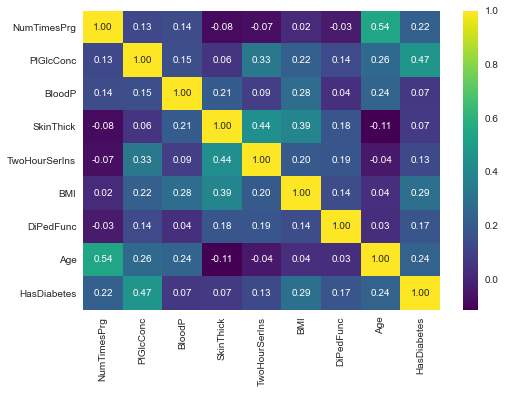

In [8]:
# visual corr matrix sử dụng heatmap
%matplotlib inline
plt.style.use('seaborn')
sns.heatmap(corr_df, annot = True, fmt = '.2f', cmap = 'viridis');

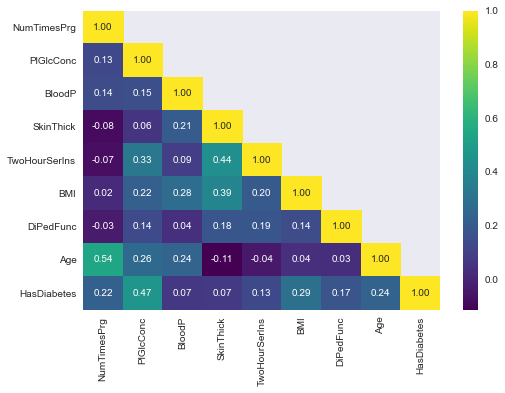

In [9]:
# bỏ qua phần trùng lặp
mask = np.array(corr_df)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_df, annot = True, 
            fmt = '.2f', cmap = 'viridis', mask=mask);

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [10]:
# In ra cột có số hiệu chỉnh lớn nhất với 'HasDiabetes'.
corr_hasDiabet = corr_df[corr_df.index != 'HasDiabetes']['HasDiabetes']
corr_hasDiabet.sort_values(ascending = False).head(1)

PlGlcConc    0.466581
Name: HasDiabetes, dtype: float64

ta thấy là cột PlGlcConc - Nồng độ glucose huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose qua đường miệng là feature có sự tương quan mạnh nhất trong tất cả các feature để xác định một người có mắc bệnh tiểu đường hay không với hệ số tương quan là 0.466581

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

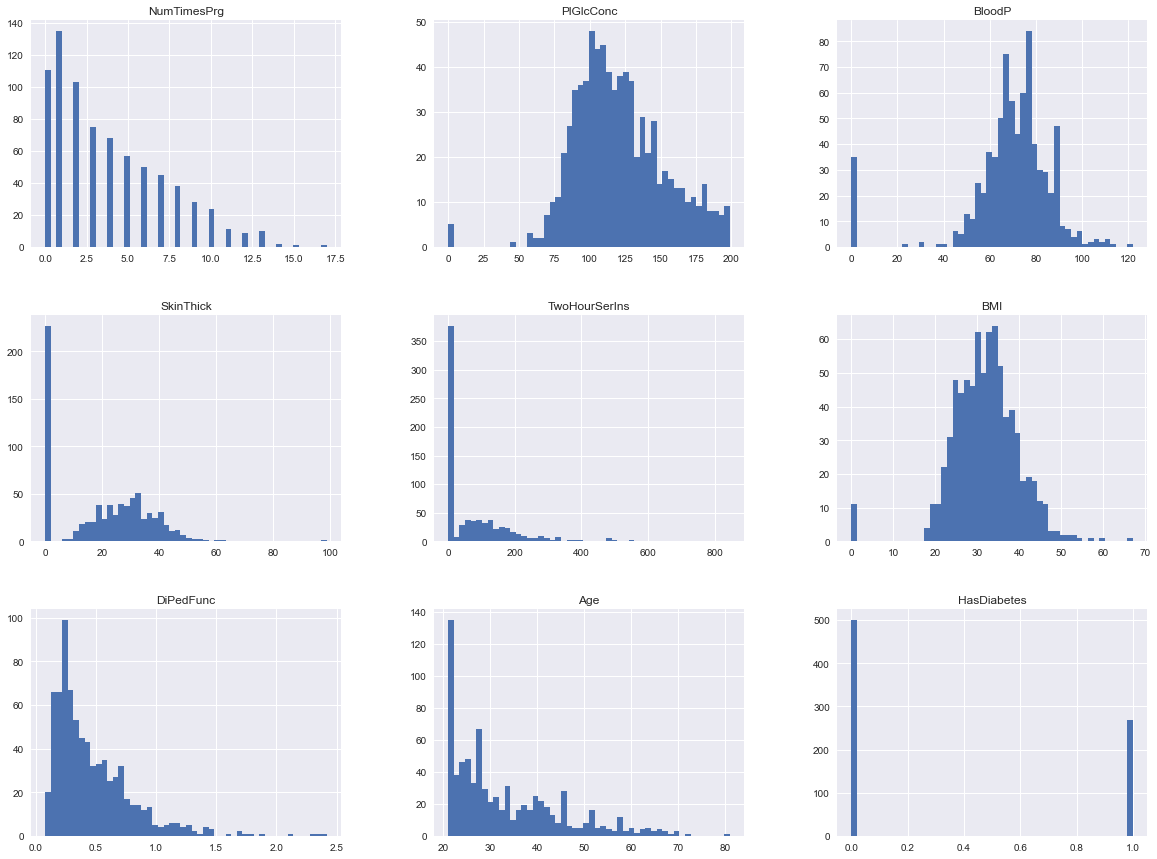

In [11]:
# Thao tác biểu đồ tần suất để thể hiện tất cả các cột dữ liệu trong bộ dữ liệu.
df.hist(bins = 50,figsize = (20,15));

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [3]:
# sử dụng các giá trị trung vị thay thế các giá trị 0 trong các trường ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']
zero_list = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']
for i in zero_list:
    df[i].replace(0,np.nan,inplace = True)
    med = df[i].median(skipna = True)
    df[i].replace(np.nan,med,inplace = True)

In [13]:
df[zero_list].min()
# các giá trị bằng 0 đã được loại bỏ ở các trường này

BMI              18.2
BloodP           24.0
PlGlcConc        44.0
SkinThick         7.0
TwoHourSerIns    14.0
dtype: float64

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [14]:
# chuẩn hóa dữ liệu bằng cách sử dụng dữ liệu trung bình bằng 0 và phương sai đơn vị

# Remove ground truth column before
y = df['HasDiabetes']
X = df.drop(columns = 'HasDiabetes')

# chuẩn hóa
ss = StandardScaler()
X = ss.fit(X).transform(X)

In [15]:
X[:5,:]

array([[ 0.63994726,  0.86604475, -0.03198993,  0.67064253, -0.18154124,
         0.16661938,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , -0.01230129, -0.18154124,
        -0.85219976, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, -0.01230129, -0.18154124,
        -1.33250021,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.5283186 , -0.69524511, -0.54064177,
        -0.63388137, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.67907616,  0.67064253,  0.31656594,
         1.5493025 ,  5.4849091 , -0.0204964 ]])

In [16]:
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: HasDiabetes, dtype: int64

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [17]:
# Chia dữ liệu thành 80/20 bằng kỹ thuật phân tầng và Random_state = 7.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                           random_state = 7,stratify=y)

In [18]:
print('shape của tập train là',X_train.shape, y_train.shape)
print('shape của tập test là',X_test.shape, y_test.shape)

shape của tập train là (614, 8) (614,)
shape của tập test là (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

#### Ta phải thực hiện data normalization và data splitting trước khi tiến hành training dữ liệu vì:

1. Đối với Normalization: Normalization thay đổi các giá trị của dữ liệu với mục đích chính để thu được 1 phân phối dữ liệu tốt hơn cho các thuật toán học máy từ đó có thể giúp mô hình huấn luyện nhanh và kết quả tốt

 Trước khi chúng ta normalized dữ liệu đầu vào, trọng số liên quan đến các features sẽ khác nhau, một số feature có trọng số sẽ lớn và một số trọng số lại nhỏ. Vì sự phân bố không đồng đều của các trọng số nên dẫn tới việc thuật toán sẽ bị dao động trong vùng tối ưu trước khi nó tìm đến vị trí cực tiểu toàn cục. Để tránh việc thuật toán học dành quá nhiều thời gian dao động khi tối ưu, ta normalize các features đầu vào về cùng tỉ lệ, phân phối. Từ đó thì dữ liệu đầu vào sẽ tỉ lệ và trọng số liên quan đến chúng cũng sẽ cùng tỉ lệ. Điều này giúp mô hình có thể học nhanh hơn.

2. đối với data splitting: Trong machine learning chúng ta cần kiểm thử để dự đoán và đánh giá khả năng hoạt động hiệu quả của mô hình trên thực tế. Khi chúng ta tách tập dữ liệu test set độc lập với tập train set và chúng ta dùng chính tập test set này để đánh giá vầ ước lượng hiệu quả của mô hình. Vì thế chúng ta phải thực hiện data splitting trước khi training mô hình

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [19]:
print('Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu đầy đủ %.2f %%'%(100*y.sum()/len(y)))

Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu đầy đủ 34.90 %


In [20]:
print('Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu huấn luyện %.2f %%'%(100*y_train.sum()/len(y_train)))

Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu huấn luyện 34.85 %


In [21]:
print('Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu thử nghiệm %.2f %%'%(100*y_test.sum()/len(y_test)))

Tỷ lệ phụ nữ dương tính/tổng số trong tập dữ liệu thử nghiệm 35.06 %


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [22]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
accuracy_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [23]:
param_grid = {
    'n_neighbors' : range(1,12),
    'weights' : ['uniform','distance'],
    'p':range(1,10)
        }
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid = param_grid)
grid_knn.fit(X_train,y_train)

# in ra tham số với sự chính xác tốt nhất
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.7524990003998401
{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:
Các tham số được sử dụng trong mô hình này như sau:
1. n_neighbors = 11: số lượng k lân cận có nghĩa là label của một điểm dữ liệu mới được suy ra trực tiếp từ 11 điểm dữ liệu gần nhất trong training set
2. p = 2 nghĩa là khoảng cách ở đây được tính là khoảng cách theo norm 2 hay còn gọi là khoảng cách  Euclid (là độ dài của đoạn thẳng nối hai điểm). Còn nếu p = 1 là khoảng cách manhattan - khoảng cách trong thành phố, là một dạng khoảng cách giữa hai điểm trong không gian Euclid với hệ tọa độ Descartes
3. weights = 'distance', giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau, tuy nhiên với weights = distance thì những điểm gần hơn có trọng số cao hơn (tin tưởng hơn) vì thế có sự công bằng hơn so với uniform

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [24]:
knn_model = grid_knn.best_estimator_

# dự đoán trên training data
yhat_train_knn = knn_model.predict(X_train)

# tinh score tập train
acc_knn_train = accuracy_score(y_train, yhat_train_knn )
f1_knn_train = f1_score(y_train, yhat_train_knn )

# dự đoán trên tập testing data
yhat_test_knn = knn_model.predict(X_test)

# tinh score tập test
acc_knn_test = accuracy_score(y_test, yhat_test_knn )
f1_knn_test = f1_score(y_test, yhat_test_knn )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_knn_train,acc_knn_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_knn_test,acc_knn_test))

training data: F1 score = 1.000 , accuracy score = 1.000
test data: F1 score = 0.667 , accuracy score = 0.779


ta thấy trên tập test thì f1 > 0.6 và accuracy score > 0.75

In [25]:
f1_scores['train']['KNN'] = f1_knn_train
accuracy_scores['train']['KNN'] = acc_knn_train
f1_scores['test']['KNN'] = f1_knn_test
accuracy_scores['test']['KNN'] = acc_knn_test

# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [51]:
# tìm tham số task 13 tương đương task 11
param_grid = {
        'criterion':['gini','entropy'],
        'max_depth':range(1,15),
        'min_samples_split': [2,4],
        'min_samples_leaf':[5, 10, 13],
        'max_leaf_nodes':[8, 16, 32],
        'max_features':['auto','sqrt','log2']
             }
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid = param_grid)
grid_dt.fit(X_train,y_train)

# in ra tham số với sự chính xác tốt nhất
print(grid_dt.best_score_)
print(grid_dt.best_params_)

0.7572437691590032
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 16, 'min_samples_leaf': 13, 'min_samples_split': 4}


In [52]:
# tính toán task 14 tương đương task 12

dt_model = grid_dt.best_estimator_

# dự đoán trên training data
yhat_train_dt = dt_model.predict(X_train)

# tinh score tập train
acc_dt_train = accuracy_score(y_train, yhat_train_dt )
f1_dt_train = f1_score(y_train, yhat_train_dt )

# dự đoán trên tập testing data
yhat_test_dt = dt_model.predict(X_test)

# tinh score tập test
acc_dt_test = accuracy_score(y_test, yhat_test_dt )
f1_dt_test = f1_score(y_test, yhat_test_dt )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_dt_train,acc_dt_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_dt_test,acc_dt_test))

training data: F1 score = 0.689 , accuracy score = 0.792
test data: F1 score = 0.625 , accuracy score = 0.766


ta thấy trên tập test thì f1 > 0.6 và accuracy score > 0.75

In [53]:
f1_scores['train']['DT'] = f1_dt_train
accuracy_scores['train']['DT'] = acc_dt_train
f1_scores['test']['DT'] = f1_dt_test
accuracy_scores['test']['DT'] = acc_dt_test

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


1. criterion Là hàm số để đo lường chất lượng phân chia ở mỗi node. Có hai lựa chọn là gini và entropy. khi criterion là entropy thì ta sử dụng chỉ số entropy  là một thước đo, miêu tả độ trong sạch của một thu thập dữ liệu tùy ý  . Trong khi đó biến criterion = gini: sử dụng chỉ số Gini Impurity để đo lường chất lượng 1 lần tách, là chỉ số thể hiện mức độ phân loại sai khi ta chọn ngẫu nhiên một phần tử từ tập data
2. 'max_depth' = 7: Chiều sâu tối đa của decision tree, ở đây max_depth = 14 thì cây quyết định có tối đa là 7 tầng
3. 'max_features' : Số lượng các biến được lựa chọn để tìm kiếm ra biến phân chia tốt nhất ở mỗi lượt phân chia, khi nó là auto thì max_features=sqrt(n_features), khi là log2 thì max_features=log2(n_features), nếu trống thì max_features=n_features
4. max_leaf_nodes = 32: Số lượng các node lá tối đa của cây quyết định. Thường được thiết lập khi muốn kiểm soát hiện tượng quá khớp, ở đây là tối đa 32 node
5. min_samples_leaf : Số lượng mẫu tối thiểu cần thiết để có ở một nút lá. Một điểm phân tách ở bất kỳ độ sâu nào sẽ chỉ được xem xét nếu nó để lại ít nhất các mẫu huấn luyện min_samples_leaf trong mỗi nhánh bên trái và bên phải. Điều này có thể có tác dụng làm mịn mô hình, đặc biệt là trong hồi quy
6. min_samples_split: Kích thước mẫu tối thiểu được yêu cầu để tiếp tục phân chia đối với node quyết định. Được sử dụng để tránh kích thước của node lá quá nhỏ nhằm giảm thiểu hiện tượng quá khớp

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [29]:
# tìm tham số task 15 tương đương task 11
param_grid = {
        'C' : np.arange(0.1,1.01,0.1),
        'kernel':['linear', 'poly' ,'rbf' ,'sigmoid'],
        'gamma':[0.05,2.01,0.05],
        'degree':[1,2,3,4],
        'probability':[True,False]
             }
grid_svm = GridSearchCV(estimator=SVC(),
                   param_grid = param_grid)
grid_svm.fit(X_train,y_train)

# in ra tham số với sự chính xác tốt nhất
print(grid_svm.best_score_)
print(grid_svm.best_params_)

0.767066506730641
{'C': 0.5, 'degree': 1, 'gamma': 0.05, 'kernel': 'poly', 'probability': True}


In [30]:
# tính toán task 14 tương đương task 12

svm_model = grid_svm.best_estimator_

# dự đoán trên training data
yhat_train_svm = svm_model.predict(X_train)

# tinh score tập train
acc_svm_train = accuracy_score(y_train, yhat_train_svm )
f1_svm_train = f1_score(y_train, yhat_train_svm )

# dự đoán trên tập testing data
yhat_test_svm = svm_model.predict(X_test)

# tinh score tập test
acc_svm_test = accuracy_score(y_test, yhat_test_svm )
f1_svm_test = f1_score(y_test, yhat_test_svm )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_svm_train,acc_svm_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_svm_test,acc_svm_test))

training data: F1 score = 0.606 , accuracy score = 0.767
test data: F1 score = 0.632 , accuracy score = 0.773


In [31]:
f1_scores['train']['SVM'] = f1_svm_train
accuracy_scores['train']['SVM'] = acc_svm_train
f1_scores['test']['SVM'] = f1_svm_test
accuracy_scores['test']['SVM'] = acc_svm_test

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:



1. kernel: Các dạng hàm kernel. Khi huấn luyện mô hình SVM chúng ta cần thử với nhiều kernels khác nhau để tìm ra kernel tốt nhất cho bộ dữ liệu huấn luyện. Các kernel phổ biến đó là: linear, poly, rbf, sigmoid. với linear là Kernel tuyến tính, hàm  tích vô hướng giữa hai véc tơ. Kernel RBF dựa trên hàm Gaussian RBF. Hàm biến đổi phi tuyến của kernel này là hàm ẩn và tương đương với một đa thức với bậc vô hạn. Kernel đa thức (poly): Tạo ra một đa thức bậc cao kết hợp giữa hai véc tơ. Kernel Sigmoid: Dựa trên kernel về đa thức, chúng ta đưa chuyển tiếp qua hàm tanh. Hàm tanh có thể biểu diễn theo hàm sigmoid nên đây được gọi là kernel Sigmoid.
2. C -trọng số  của hàm chi phí, biểu thị mức độ phạt trong lề mềm (soft margin)
3. gamma: Hệ số Kernel cho ‘rbf’, ‘poly’ và ‘sigmoid’. Một cách trực quan, Gamma sẽ biểu thị xem mức độ xa gần của các vector hỗ trợ (support vector). Gamma càng nhỏ các vector hỗ trợ (support vector) sẽ ở càng ở xa so với siêu phẳng (hyperplane). Khi để Gamma quá lớn SVM model sẽ càng cong theo dữ liệu không tuyến tính (non-linear), từ đó dễ dẫn đến việc quá vừa vặn (overfit). Tuy nhiên nếu để Gamma quá nhỏ, SVM model sẽ trở nên rất dễ dãi
4. degree: Bậc d của đa thức, Bậc của hàm kernel đa thức (‘poly’). Bị bỏ qua bởi tất cả các kernel  khác.
5. Có bật ước tính xác suất hay không. Điều này phải được làm trước khi fit, sẽ làm chậm phương pháp đó vì nó sử dụng nội bộ xác thực chéo 5 lần và dự đoán_proba có thể không nhất quán với dự đoán

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [32]:
# tìm tham số task 15 tương đương task 11
param_grid = {
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': np.arange(0.1,1.01,0.1),
        'max_iter' : [50,100,200,300,400],
        'tol' : [1e-3,1e-4,1e-5],
        'fit_intercept' : [True, False]
             }
grid_lr = GridSearchCV(estimator=LogisticRegression(),
                   param_grid = param_grid)
grid_lr.fit(X_train,y_train)

# in ra tham số với sự chính xác tốt nhất
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7605357856857257
{'C': 0.2, 'fit_intercept': True, 'max_iter': 50, 'solver': 'newton-cg', 'tol': 0.001}


In [33]:
# tính toán task 14 tương đương task 12

lr_model = grid_lr.best_estimator_

# dự đoán trên training data
yhat_train_lr = lr_model.predict(X_train)

# tinh score tập train
acc_lr_train = accuracy_score(y_train, yhat_train_lr )
f1_lr_train = f1_score(y_train, yhat_train_lr )

# dự đoán trên tập testing data
yhat_test_lr = lr_model.predict(X_test)

# tinh score tập test
acc_lr_test = accuracy_score(y_test, yhat_test_lr )
f1_lr_test = f1_score(y_test, yhat_test_lr )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_lr_train,acc_lr_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_lr_test,acc_lr_test))

training data: F1 score = 0.619 , accuracy score = 0.765
test data: F1 score = 0.640 , accuracy score = 0.766


In [34]:
f1_scores['train']['LR'] = f1_lr_train
accuracy_scores['train']['LR'] = acc_lr_train
f1_scores['test']['LR'] = f1_lr_test
accuracy_scores['test']['LR'] = acc_lr_test

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


1. Solver Thuật toán sử dụng trong bài toán tối ưu hóa.với solver = Phương pháp Newton trong logistics sử dụng đạo hàm bậc 2 đem tại tốc độ tốt hơn. Đối với các tập dữ liệu nhỏ, ‘liblinear’ là một lựa chọn tốt, trong khi ‘sag’ và ‘saga’ nhanh hơn cho các tập lớn;Đối với các bài toán đa thức, chỉ có ‘newton-cg’, ‘sag’, ‘saga’ và ‘lbfgs’ xử lý mất đa thức;
2. C : Inverse regularization parameter -  C = 1/λ. trong đó hằng số λ nhân với tổng các giá trị tham số bình phương để giảm thiểu lỗi có nhiều tham số
3. fit_intercept : True or False Chỉ định xem một hằng số có nên được thêm vào hàm quyết định hay không.
4. max_iter :điều kiện dừng, là đạt đến 1 số lần lặp = số mình truyền vào thì dừng, là số lần lặp tối đa cho phép
5. tol : độ chính xác của model khi đạt được sẽ không lặp nữa

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [54]:
#TO DO:
#create a list of our models
estimators = [('KNN',knn_model),
              ('DT',dt_model),
              ('SVM',svm_model),
               ('LR',lr_model)]
#create our voting classifier, inputting our models
ensoft_model = VotingClassifier(estimators = estimators,
                       voting='soft')
ensoft_model.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(n_neighbors=11,
                                                   weights='distance')),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_features='log2',
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=4)),
                             ('SVM',
                              SVC(C=0.5, degree=1, gamma=0.05, kernel='poly',
                                  probability=True)),
                             ('LR',
                              LogisticRegression(C=0.2, max_iter=50,
                                                 solver='newton-cg',
        

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [55]:
# dự đoán trên training data
yhat_train_ensoft = ensoft_model.predict(X_train)

# tinh score tập train
acc_ensoft_train = accuracy_score(y_train, yhat_train_ensoft )
f1_ensoft_train = f1_score(y_train, yhat_train_ensoft )

# dự đoán trên tập testing data
yhat_test_ensoft = ensoft_model.predict(X_test)

# tinh score tập test
acc_ensoft_test = accuracy_score(y_test, yhat_test_ensoft )
f1_ensoft_test = f1_score(y_test, yhat_test_ensoft )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_ensoft_train,acc_ensoft_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_ensoft_test,acc_ensoft_test))

training data: F1 score = 0.868 , accuracy score = 0.912
test data: F1 score = 0.694 , accuracy score = 0.805


In [56]:
f1_scores['train']['EN_SOFT'] = f1_ensoft_train
accuracy_scores['train']['EN_SOFT'] = acc_ensoft_train
f1_scores['test']['EN_SOFT'] = f1_ensoft_test
accuracy_scores['test']['EN_SOFT'] = acc_ensoft_test

### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [57]:
# Khớp thành công một mô hình hard voting với 3 thuật toán chính (không có SVM). (3%)
estimators = [('KNN',knn_model),
              ('DT',dt_model),
               ('LR',lr_model)]
#create our voting classifier, inputting our models
enhard_model = VotingClassifier(estimators = estimators,
                       voting='hard')
enhard_model.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(n_neighbors=11,
                                                   weights='distance')),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_features='log2',
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=4)),
                             ('LR',
                              LogisticRegression(C=0.2, max_iter=50,
                                                 solver='newton-cg',
                                                 tol=0.001))])

In [58]:
# dự đoán trên training data
yhat_train_enhard = enhard_model.predict(X_train)

# tinh score tập train
acc_enhard_train = accuracy_score(y_train, yhat_train_enhard )
f1_enhard_train = f1_score(y_train, yhat_train_enhard )

# dự đoán trên tập testing data
yhat_test_enhard = enhard_model.predict(X_test)

# tinh score tập test
acc_enhard_test = accuracy_score(y_test, yhat_test_enhard )
f1_enhard_test = f1_score(y_test, yhat_test_enhard )

print('training data: F1 score = %.3f , accuracy score = %.3f' % (f1_enhard_train,acc_enhard_train))
print('test data: F1 score = %.3f , accuracy score = %.3f' % (f1_enhard_test,acc_enhard_test))

training data: F1 score = 0.822 , accuracy score = 0.883
test data: F1 score = 0.660 , accuracy score = 0.773


In [59]:
f1_scores['train']['EN_HARD'] = f1_enhard_train
accuracy_scores['train']['EN_HARD'] = acc_enhard_train
f1_scores['test']['EN_HARD'] = f1_enhard_test
accuracy_scores['test']['EN_HARD'] = acc_enhard_test

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [60]:
# tao dataframe tu 2 dictionary
acc_df = pd.DataFrame(accuracy_scores).rename(columns={'train':'Accuracy-training',
                                     'test':'Accuracy-testing'})
f1_df = pd.DataFrame(f1_scores).rename(columns={'train':'F1-score-training',
                                     'test':'F1-score-testing'})
# concat 2 dictionary nay
report_df = pd.concat([acc_df,f1_df],axis=1,)
report_df['Algorithm'] = ['KNN','Decision Tree','SVM','Logistic Regression','Hard Voting','Soft Voting']
report_df.reset_index(drop = True,inplace = True)
report_df.reindex(columns=['Algorithm','Accuracy-training','F1-score-training','Accuracy-testing','F1-score-testing'])

,Algorithm,Accuracy-training,F1-score-training,Accuracy-testing,F1-score-testing
0,KNN,1.000000,1.000000,0.779221,0.666667
1,Decision Tree,0.791531,0.689320,0.766234,0.625000
2,SVM,0.767101,0.606061,0.772727,0.631579
3,Logistic Regression,0.765472,0.619048,0.766234,0.640000
4,Hard Voting,0.882736,0.821782,0.772727,0.660194
5,Soft Voting,0.912052,0.867647,0.805195,0.693878


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
Từ bảng report tổng hợp hợp ta thấy đối với Ensemble model sử dụng soft voting, trong tập train, thấy có tăng lên của cả accuracy score và f1 score so với các single model ngoại trừ KNN model, còn đối với tập test thì các score này tăng lên so với tất cả các single model. Tuy nhiên với Ensemble model sử dụng hard voting thì scores chỉ lớn hơn score của Logistic Regression	, và không lớn hơn hơn các mô hình còn lại

ta thấy được không phải lúc nào thì ensemble methods cũng trả về dự đoán tốt hơn so với single model. Nguyên nhân là thứ nhất có nhiều phương pháp ensemble khác nhau, mỗi cái có một ưu điểm và nhược điểm riêng. Ví dụ: nếu bạn có các mô hình có phương sai cao (chúng quá khớp với dữ liệu của bạn), thì bạn có khả năng được lợi khi sử dụng bagging. Nếu mô hình bias cao thì nên kết hợp chúng với Boosting. Nếu bạn sử dụng sai phương pháp kết hợp cho cài đặt của mình, bạn sẽ không làm tốt hơn. Ví dụ, sử dụng Bagging với một biased model sẽ không hữu ích

In [12]:
# làm thêm : nếu không normalize thì với model decision tree chạy có thay đổi giá trị hay không
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 7)

In [21]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(),
             param_grid= {'max_depth':[3,5,10,15,20],
                          'criterion':['gini','entropy'],
                         'max_leaf_nodes' : [5,10,15,20,25,30,35,40],
                          'min_samples_split' : [2,4,6]
             },
             cv = 10)
grid.fit(X_train,y_train)

print(grid.best_estimator_)
from sklearn.metrics import jaccard_score
dt_model2 = grid.best_estimator_

yhat = dt_model2.predict(X_test)

print('accuracy score',accuracy_score(y_test,yhat))
print('f1 score',f1_score(y_test,yhat))
print('jaccard score',jaccard_score(y_test,yhat, average = 'weighted'))

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=20)
accuracy score 0.7727272727272727
f1 score 0.7008547008547009
jaccard score 0.6344529364440868


Ta thấy grid trả về giá trị max_depth = 10 và max_leaf_nodes = 20, entropy gần như tất cả các lần > cho thấy khi dùng gridsearchcv cho decision tree không nên làm normalization